<a href="https://colab.research.google.com/github/sahithikota23/KOA-Grading/blob/main/NasNetLarge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Knee-project

/content/drive/.shortcut-targets-by-id/1V41lPa-_s_0gMaM6kaSDAUBVlOmIacX3/Knee-project


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import os
from tensorflow.keras.applications.nasnet import NASNetLarge
import keras
#from numpy import load

#from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
#from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
#from keras.layers import Dropout
#from tensorflow.keras.layers import BatchNormalization


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [ ]:
train_dir='/content/drive/MyDrive/Knee-project/train/'
test_dir='/content/drive/MyDrive/Knee-project/test/'

In [ ]:
batch_size=64
epochs = 10
img_height = 331
img_width = 331

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [ ]:
 base_model = NASNetLarge(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))


343610240/343610240 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [ ]:
base_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 331, 331, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 165, 165, 96)         2592      ['input_1[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 165, 165, 96)         384       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation (Activation)     (None, 165, 165, 96)         0         ['stem_bn1[0][0]']       

In [ ]:
classifier = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:

classifier.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
history = classifier.fit(train_data_gen, epochs=10,
validation_data= val_data_gen)

Epoch 1/10
26/26 [==============================] - 698s 26s/step - loss: 27.7465 - accuracy: 0.3788 - val_loss: 5.2136 - val_accuracy: 0.5606
Epoch 2/10
26/26 [==============================] - 90s 4s/step - loss: 2.6665 - accuracy: 0.6964 - val_loss: 1.1203 - val_accuracy: 0.8255
Epoch 3/10
26/26 [==============================] - 130s 5s/step - loss: 0.7742 - accuracy: 0.8582 - val_loss: 0.3780 - val_accuracy: 0.9436
Epoch 4/10
26/26 [==============================] - 93s 4s/step - loss: 0.3352 - accuracy: 0.9358 - val_loss: 0.1993 - val_accuracy: 0.9745
Epoch 5/10
26/26 [==============================] - 131s 5s/step - loss: 0.1787 - accuracy: 0.9691 - val_loss: 0.1225 - val_accuracy: 0.9842
Epoch 6/10
26/26 [==============================] - 94s 4s/step - loss: 0.0988 - accuracy: 0.9855 - val_loss: 0.1181 - val_accuracy: 0.9885
Epoch 7/10
26/26 [==============================] - 96s 4s/step - loss: 0.1181 - accuracy: 0.9867 - val_loss: 0.0907 - val_accuracy: 0.9855
Epoch 8/10
26/2

In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

26/26 - 49s - 49s/epoch - 2s/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [ ]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

Confusion matrix, without normalization
[[500   2   0   1   0]
 [ 13 472   0   3   0]
 [  0   0 231   1   0]
 [  0   0   0 221   0]
 [  0   0   0   0 206]]
Accuracy: 0.988
Precision: 0.997
Recall: 0.988
F-Measure: 0.988


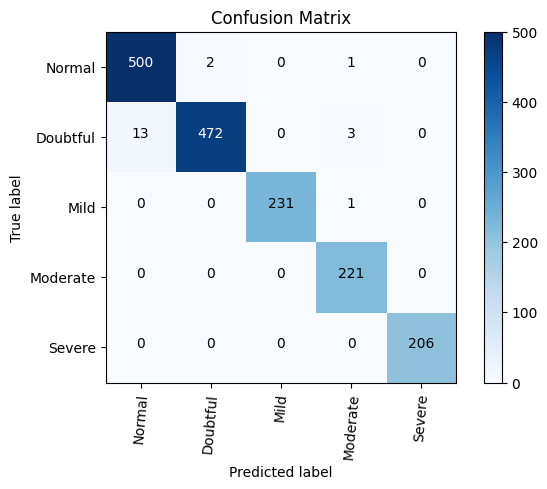

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred


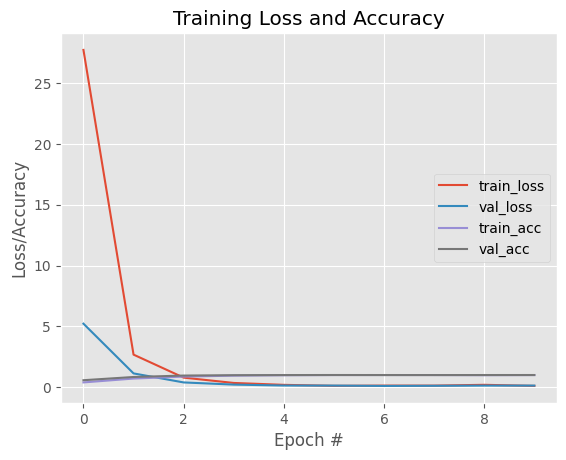

In [ ]:
# plot the training loss and accuracy
N = 10 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"],label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
#plt.savefig("CNN_Model")